## 1. Download data

url: https://archive.ics.uci.edu/static/public/477/real+estate+valuation+data+set.zip

## 2. Import library and read data

In [226]:
import pandas as pd
df = pd.read_excel('data/Real estate valuation data set.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


## Data Exploration

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [228]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [229]:
df.isnull().sum() # check missing value

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Visualize

In [230]:
import os
def savefig(figure, filename):
    if not os.path.exists('images'):
        os.makedirs('images')
    filename = f'images/{filename}'
    figure.savefig(filename)

/tmp/ipykernel_71580/2594224625.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins = 50, figsize=(18, 10), ax = ax)


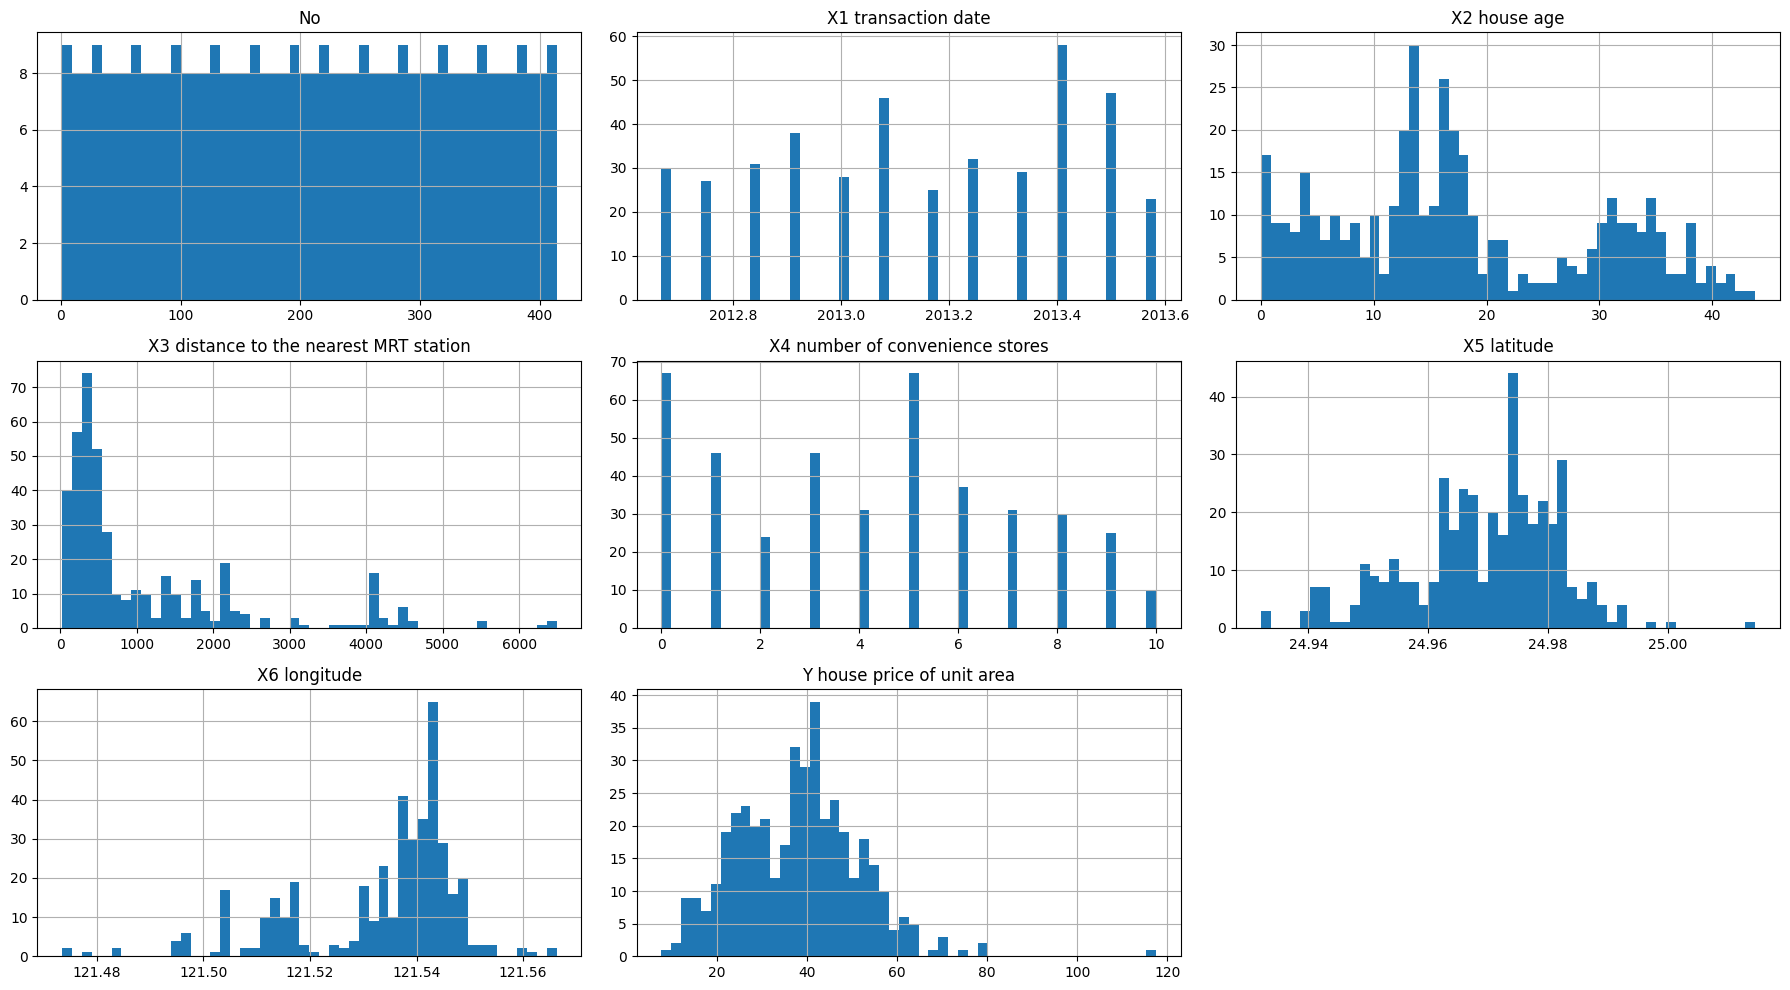

In [231]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 10))
df.hist(bins = 50, figsize=(18, 10), ax = ax)
savefig(fig, 'histograms.png')
plt.tight_layout()
plt.show()

In [232]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

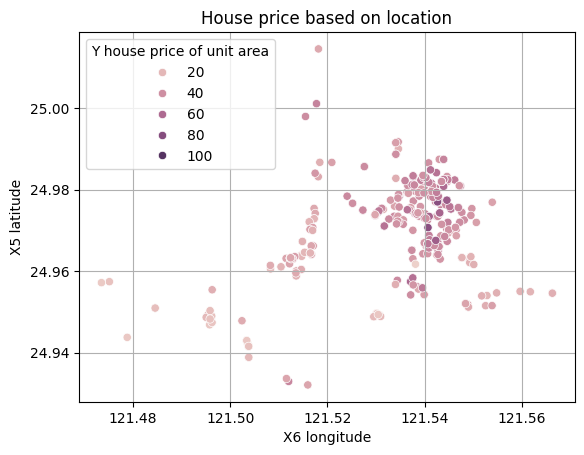

In [233]:
import seaborn as sns
sns.scatterplot(data = df, x = 'X6 longitude', y = 'X5 latitude', hue = 'Y house price of unit area')
plt.title('House price based on location')
savefig(plt, 'House price based on location.png')
plt.grid(True)
plt.show()

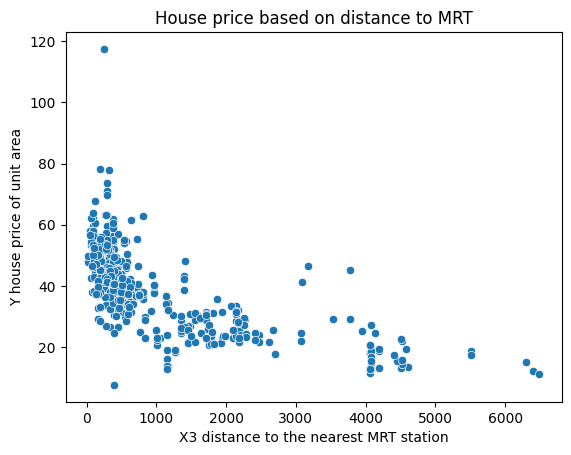

In [234]:
sns.scatterplot(data=df, x='X3 distance to the nearest MRT station', y='Y house price of unit area')
plt.title('House price based on distance to MRT')
savefig(plt, 'House price based on distance to MRT.png')
plt.show()

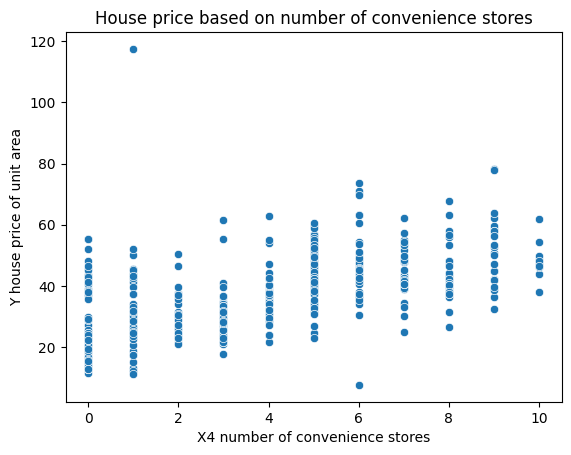

In [235]:
sns.scatterplot(data=df, x='X4 number of convenience stores', y='Y house price of unit area')
plt.title('House price based on number of convenience stores')
savefig(plt, 'House price based on number of convenience stores.png')
plt.show()

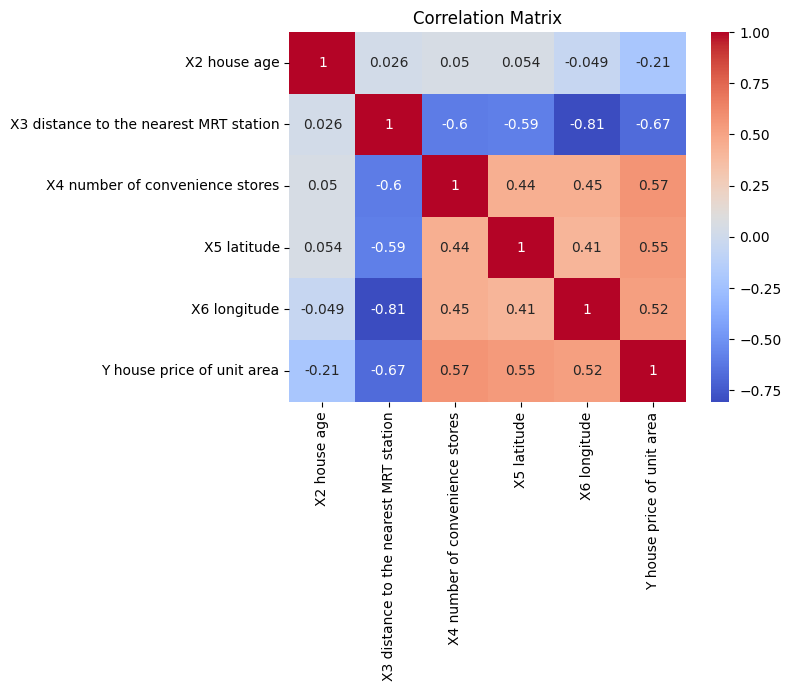

In [236]:
# make corr matrix
corr_matrix = df.corr()
# plot corr matrix
# remove attributes: "No", "X1 transaction date"
corr_matrix = df.drop(['No', 'X1 transaction date'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
savefig(plt, 'correlation_matrix.png')
plt.show()

## Data Preprocessing And Feature Engineer

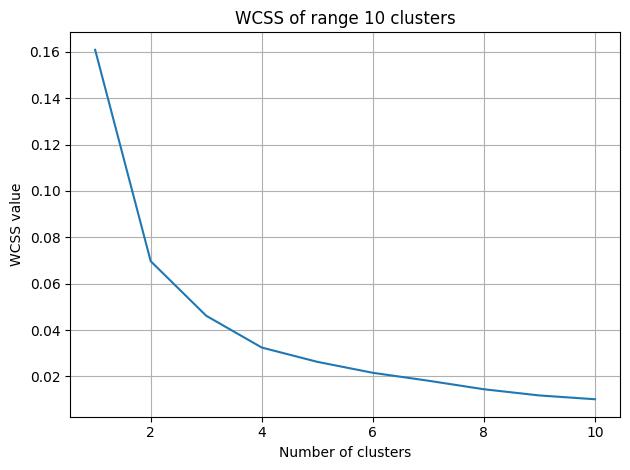

In [237]:
# clustering location
from sklearn.cluster import KMeans

wcss = []
for K in range(1,11):
    kmeans = KMeans(n_clusters=K, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df[['X6 longitude', 'X5 latitude']])
    wcss.append(kmeans.inertia_)

# plot WCSS
plt.plot(range(1, 11), wcss)
plt.title('WCSS of range 10 clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS value')
plt.grid(True)
plt.tight_layout()
savefig(plt, 'WCSS.png')
plt.show()

Chọn 2 là K clusters

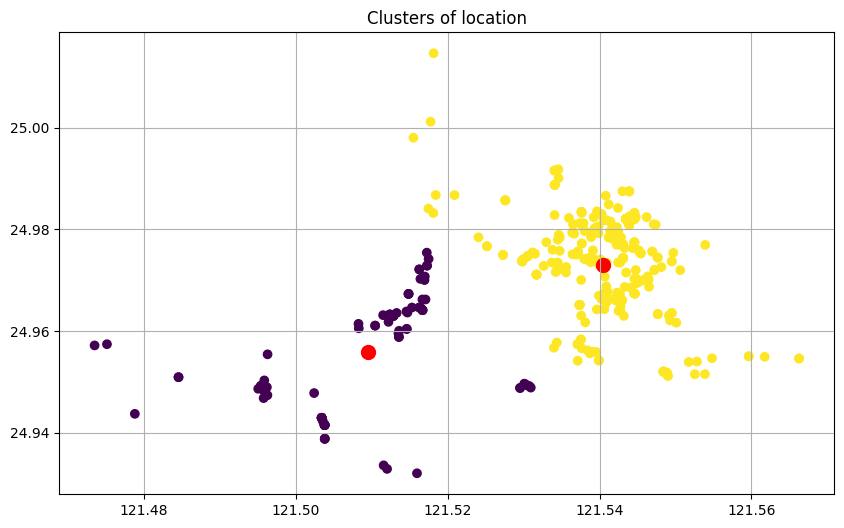

In [238]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
kmeans.fit(df[['X6 longitude', 'X5 latitude']])
clusters = kmeans.cluster_centers_
# plot clusters
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.scatter(df['X6 longitude'], df['X5 latitude'], c=kmeans.labels_)
plt.scatter(clusters[:, 0], clusters[:, 1], s=100, c='red')
plt.title('Clusters of location')
savefig(plt, 'clusters.png')
plt.show()

In [239]:
print(clusters) # make sure the cluster is ascending

[[121.50952263  24.95594547]
 [121.54046031  24.97292674]]


In [240]:
# add clusters to df
df['clusters'] = kmeans.labels_

In [241]:
# Select features
num_features = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
cat_features = ['clusters']

X = df[num_features + cat_features].values
y = df['Y house price of unit area'].values

In [242]:
# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_transformed = ct.fit_transform(X)

In [243]:
X_transformed

array([[  0.     ,   1.     ,  32.     , ...,  10.     ,  24.98298,
        121.54024],
       [  0.     ,   1.     ,  19.5    , ...,   9.     ,  24.98034,
        121.53951],
       [  0.     ,   1.     ,  13.3    , ...,   5.     ,  24.98746,
        121.54391],
       ...,
       [  0.     ,   1.     ,  18.8    , ...,   7.     ,  24.97923,
        121.53986],
       [  0.     ,   1.     ,   8.1    , ...,   5.     ,  24.96674,
        121.54067],
       [  0.     ,   1.     ,   6.5    , ...,   9.     ,  24.97433,
        121.5431 ]])

In [244]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
print(f'Train size: {len(X_train)}')
print(f'Test size: {len(X_test)}')

Train size: 331
Test size: 83


In [245]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 2:] = sc.fit_transform(X_train[:, 2:])
X_test[:, 2:] = sc.transform(X_test[:, 2:])

## Train a Regression model

In [246]:
(X_train.shape, y_train.shape)

((331, 7), (331,))

In [247]:
(X_test.shape, y_test.shape)

((83, 7), (83,))

In [248]:
# use Lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

lasso = Lasso()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [249]:
# use Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [250]:
# predict
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_ridge = ridge_regressor.predict(X_test)

In [251]:
lasso_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})
ridge_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})

In [252]:
lasso_pred

,Actual,Predicted
0,45.1,49.263224
1,42.3,44.386773
2,52.2,47.332186
3,37.3,44.283765
4,22.8,26.452957
...,...,...
78,25.0,44.044123
79,23.5,36.954276
80,35.6,43.454624
81,46.1,44.809633


In [253]:
ridge_pred

,Actual,Predicted
0,45.1,49.157843
1,42.3,44.253130
2,52.2,47.138568
3,37.3,44.084152
4,22.8,26.595285
...,...,...
78,25.0,43.991759
79,23.5,36.747819
80,35.6,43.381673
81,46.1,44.871627


In [254]:
# calculate metric
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error of Lasso: {mse_lasso}')
print(f'Mean Squared Error of Ridge: {mse_ridge}')

Mean Squared Error of Lasso: 51.12239190666432
Mean Squared Error of Ridge: 50.81731937470158
